In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd

# Prueba inicial del trabajo con los dataframes, para ver la cantidad de #1's

In [2]:
df_1 = pd.read_csv("real_electronic_sim/real_electronic_sim_1.txt", sep="	")
df_1

,time,V(input),V(out),V(out_fs),V(out_preamp)
0,0.000000e+00,0.000000,5.000000e-09,0.000000e+00,0.000000e+00
1,1.541014e-08,0.000004,5.000000e-09,4.857107e-11,-1.480695e-08
2,1.542691e-08,0.000017,5.000000e-09,-2.282113e-08,4.066854e-09
3,1.544369e-08,0.000033,5.000000e-09,-2.212556e-08,-2.229564e-07
4,1.546047e-08,0.000054,5.000000e-09,2.135273e-09,-6.958768e-07
...,...,...,...,...,...
293196,3.237803e-05,0.000033,5.000000e-09,-1.048708e-06,-3.305053e-04
293197,3.240977e-05,0.000033,5.000000e-09,-8.473339e-07,-3.305053e-04
293198,3.244151e-05,0.000033,5.000000e-09,-2.372922e-07,-3.305053e-04
293199,3.247325e-05,0.000033,5.000000e-09,1.399959e-07,-3.305053e-04


(3.0000000000000004e-05, 3.2000000000000005e-05)

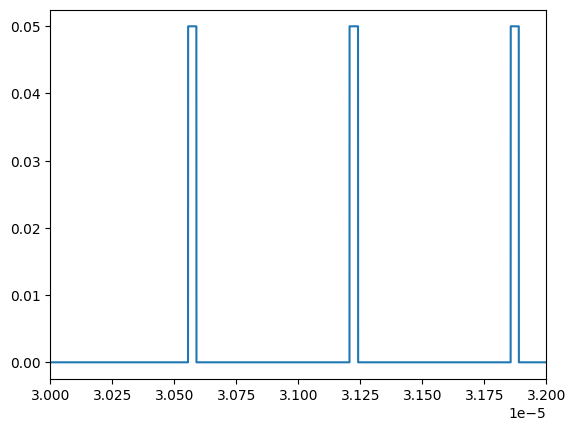

In [3]:
plt.plot(df_1["time"],df_1["V(out)"])
plt.xlim(3*10**-5,3.2*10**-5)

In [4]:
pulse_widths_1 = []
threshold = 0.02  # 50 mV threshold (I put it a bit lower to ensure I am accurate)
pulse_start_time = None

for index, row in df_1.iterrows():
    if row['V(out)'] > threshold and (pulse_start_time is None or df_1['V(out)'].iloc[index-1] <= threshold):
        # Rising edge detected
        pulse_start_time = row['time']
    elif row['V(out)'] <= threshold and pulse_start_time is not None and df_1['V(out)'].iloc[index-1] > threshold:
        # Falling edge detected
        pulse_end_time = row['time']
        # Calculate pulse width
        width = (pulse_end_time - pulse_start_time) / 3.125e-9
        pulse_widths_1.append(width)
        # Reset pulse_start_time
        pulse_start_time = None

# Convert pulse_widths to a DataFrame and approximate to the closest lower integer
pulse_widths_df_1 = pd.DataFrame(np.floor(pulse_widths_1), columns=['Pulse Width (divided by 3.125 ns)'])
print(pulse_widths_df_1)

    Pulse Width (divided by 3.125 ns)
0                                 3.0
1                                 5.0
2                                 6.0
3                                 6.0
4                                 7.0
5                                 7.0
6                                 8.0
7                                 8.0
8                                 8.0
9                                 8.0
10                                8.0
11                                8.0
12                                9.0
13                                9.0
14                                9.0
15                                9.0
16                               10.0
17                                9.0
18                                9.0
19                                9.0
20                                9.0
21                                9.0
22                                9.0
23                                9.0
24                               10.0
25          

In [5]:
df_2 = pd.read_csv("real_electronic_sim/real_electronic_sim_2.txt", sep="	")
print(df_2)

pulse_widths_2 = []
threshold = 0.02  # 50 mV threshold (I put it a bit lower to ensure I am accurate)
pulse_start_time = None

for index, row in df_2.iterrows():
    if row['V(out)'] > threshold and (pulse_start_time is None or df_2['V(out)'].iloc[index-1] <= threshold):
        # Rising edge detected
        pulse_start_time = row['time']
    elif row['V(out)'] <= threshold and pulse_start_time is not None and df_2['V(out)'].iloc[index-1] > threshold:
        # Falling edge detected
        pulse_end_time = row['time']
        # Calculate pulse width
        width = (pulse_end_time - pulse_start_time) / 3.125e-9
        pulse_widths_2.append(width)
        # Reset pulse_start_time
        pulse_start_time = None

# Convert pulse_widths to a DataFrame and approximate to the closest lower integer
pulse_widths_df_2 = pd.DataFrame(np.floor(pulse_widths_2), columns=['Pulse Width (divided by 3.125 ns)'])
print(pulse_widths_df_2)

                time  V(input)        V(out)     V(out_fs)  V(out_preamp)
0       0.000000e+00  0.000000  5.000000e-09  0.000000e+00   0.000000e+00
1       1.155885e-08  0.000007  5.000000e-09  8.153555e-11  -2.485621e-08
2       1.158129e-08  0.000039  5.000000e-09 -7.455855e-08  -2.403760e-07
3       1.160373e-08  0.000073  5.000000e-09 -6.343114e-08  -9.277190e-07
4       1.162616e-08  0.000107  5.000000e-09  3.346377e-08  -2.086885e-06
...              ...       ...           ...           ...            ...
292313  3.233390e-05  0.000040  5.000000e-09 -1.607079e-07  -4.015962e-04
292314  3.237017e-05  0.000040  5.000000e-09  1.316940e-08  -4.016000e-04
292315  3.240644e-05  0.000040  5.000000e-09  2.859344e-07  -4.016103e-04
292316  3.246992e-05  0.000040  5.000000e-09  1.083944e-07  -4.016103e-04
292317  3.250000e-05  0.000040  5.000000e-09  2.686692e-07  -4.016103e-04

[292318 rows x 5 columns]
    Pulse Width (divided by 3.125 ns)
0                                 3.0
1        

In [6]:
df_3 = pd.read_csv("real_electronic_sim/real_electronic_sim_3.txt", sep="	")
print(df_3)

pulse_widths_3 = []
threshold = 0.02  # 50 mV threshold (I put it a bit lower to ensure I am accurate)
pulse_start_time = None

for index, row in df_3.iterrows():
    if row['V(out)'] > threshold and (pulse_start_time is None or df_3['V(out)'].iloc[index-1] <= threshold):
        # Rising edge detected
        pulse_start_time = row['time']
    elif row['V(out)'] <= threshold and pulse_start_time is not None and df_3['V(out)'].iloc[index-1] > threshold:
        # Falling edge detected
        pulse_end_time = row['time']
        # Calculate pulse width
        width = (pulse_end_time - pulse_start_time) / 3.125e-9
        pulse_widths_3.append(width)
        # Reset pulse_start_time
        pulse_start_time = None

# Convert pulse_widths to a DataFrame and approximate to the closest lower integer
pulse_widths_df_3 = pd.DataFrame(np.floor(pulse_widths_3), columns=['Pulse Width (divided by 3.125 ns)'])
print(pulse_widths_df_3)

                time  V(input)        V(out)     V(out_fs)  V(out_preamp)
0       0.000000e+00  0.000000  5.000000e-09  0.000000e+00   0.000000e+00
1       3.956319e-09  0.000008  5.000000e-09  1.004880e-10  -3.063388e-08
2       3.987386e-09  0.000062  5.000000e-09 -2.379840e-07  -6.995921e-07
3       4.018454e-09  0.000114  5.000000e-09 -1.930390e-07  -2.225796e-06
4       4.049521e-09  0.000163  5.000000e-09  1.349354e-07  -4.609245e-06
...              ...       ...           ...           ...            ...
294486  3.230941e-05  0.000041  5.000000e-09 -5.848963e-07  -4.049974e-04
294487  3.234115e-05  0.000041  5.000000e-09 -4.239271e-07  -4.050018e-04
294488  3.237288e-05  0.000041  5.000000e-09 -5.435021e-08  -4.050141e-04
294489  3.249984e-05  0.000041  5.000000e-09 -2.218136e-07  -4.050141e-04
294490  3.250000e-05  0.000041  5.000000e-09 -2.278726e-07  -4.050141e-04

[294491 rows x 5 columns]
    Pulse Width (divided by 3.125 ns)
0                                 2.0
1        

In [7]:
df_4 = pd.read_csv("real_electronic_sim/real_electronic_sim_4.txt", sep="	")
print(df_4)

pulse_widths_4 = []
threshold = 0.02  # 50 mV threshold (I put it a bit lower to ensure I am accurate)
pulse_start_time = None

for index, row in df_4.iterrows():
    if row['V(out)'] > threshold and (pulse_start_time is None or df_4['V(out)'].iloc[index-1] <= threshold):
        # Rising edge detected
        pulse_start_time = row['time']
    elif row['V(out)'] <= threshold and pulse_start_time is not None and df_4['V(out)'].iloc[index-1] > threshold:
        # Falling edge detected
        pulse_end_time = row['time']
        # Calculate pulse width
        width = (pulse_end_time - pulse_start_time) / 3.125e-9
        pulse_widths_4.append(width)
        # Reset pulse_start_time
        pulse_start_time = None

# Convert pulse_widths to a DataFrame and approximate to the closest lower integer
pulse_widths_df_4 = pd.DataFrame(np.floor(pulse_widths_4), columns=['Pulse Width (divided by 3.125 ns)'])
print(pulse_widths_df_4)

                time  V(input)        V(out)     V(out_fs)  V(out_preamp)
0       0.000000e+00  0.000000  5.000000e-09  0.000000e+00   0.000000e+00
1       8.452818e-09  0.000008  5.000000e-09  2.197866e-09  -1.120280e-07
2       8.491745e-09  0.000088  5.000000e-09 -5.120378e-07  -1.519432e-06
3       8.530672e-09  0.000163  5.000000e-09 -3.578984e-07  -4.338550e-06
4       8.569599e-09  0.000233  5.000000e-09  4.646160e-07  -8.569380e-06
...              ...       ...           ...           ...            ...
294360  3.209298e-05  0.000034  5.000000e-09 -1.522782e-04  -3.466863e-04
294361  3.212472e-05  0.000034  5.000000e-09 -6.359929e-06  -3.416093e-04
294362  3.221993e-05  0.000034  5.000000e-09  3.998943e-06  -3.406775e-04
294363  3.247384e-05  0.000034  5.000000e-09  1.427463e-07  -3.406774e-04
294364  3.250000e-05  0.000034  5.000000e-09  2.247449e-07  -3.406774e-04

[294365 rows x 5 columns]
    Pulse Width (divided by 3.125 ns)
0                                 1.0
1        

In [8]:
df_5 = pd.read_csv("real_electronic_sim/real_electronic_sim_5.txt", sep="	")
print(df_5)

pulse_widths_5 = []
threshold = 0.02  # 50 mV threshold (I put it a bit lower to ensure I am accurate)
pulse_start_time = None

for index, row in df_5.iterrows():
    if row['V(out)'] > threshold and (pulse_start_time is None or df_5['V(out)'].iloc[index-1] <= threshold):
        # Rising edge detected
        pulse_start_time = row['time']
    elif row['V(out)'] <= threshold and pulse_start_time is not None and df_5['V(out)'].iloc[index-1] > threshold:
        # Falling edge detected
        pulse_end_time = row['time']
        # Calculate pulse width
        width = (pulse_end_time - pulse_start_time) / 3.125e-9
        pulse_widths_5.append(width)
        # Reset pulse_start_time
        pulse_start_time = None

# Convert pulse_widths to a DataFrame and approximate to the closest lower integer
pulse_widths_df_5 = pd.DataFrame(np.floor(pulse_widths_5), columns=['Pulse Width (divided by 3.125 ns)'])
print(pulse_widths_df_5)

                time  V(input)        V(out)     V(out_fs)  V(out_preamp)
0       0.000000e+00  0.000000  5.000000e-09  0.000000e+00   0.000000e+00
1       2.054685e-09  0.000008  5.000000e-09  4.785247e-10  -4.123565e-08
2       2.104130e-09  0.000097  5.000000e-09 -8.922713e-07  -2.117903e-06
3       2.153575e-09  0.000178  5.000000e-09 -5.736104e-07  -6.036826e-06
4       2.203020e-09  0.000252  5.000000e-09  9.564612e-07  -1.179800e-05
...              ...       ...           ...           ...            ...
293439  3.208914e-05  0.000038  5.000000e-09 -2.027938e-04  -3.928886e-04
293440  3.212088e-05  0.000038  5.000000e-09 -1.557481e-05  -3.860520e-04
293441  3.215261e-05  0.000038  5.000000e-09  6.377812e-07  -3.847576e-04
293442  3.247000e-05  0.000038  5.000000e-09  1.078303e-07  -3.846908e-04
293443  3.250000e-05  0.000038  5.000000e-09  2.750943e-07  -3.846908e-04

[293444 rows x 5 columns]
    Pulse Width (divided by 3.125 ns)
0                                 2.0
1        

In [9]:
df_6 = pd.read_csv("real_electronic_sim/real_electronic_sim_6.txt", sep="	")
print(df_6)

pulse_widths_6 = []
threshold = 0.02  # 50 mV threshold (I put it a bit lower to ensure I am accurate)
pulse_start_time = None

for index, row in df_6.iterrows():
    if row['V(out)'] > threshold and (pulse_start_time is None or df_6['V(out)'].iloc[index-1] <= threshold):
        # Rising edge detected
        pulse_start_time = row['time']
    elif row['V(out)'] <= threshold and pulse_start_time is not None and df_6['V(out)'].iloc[index-1] > threshold:
        # Falling edge detected
        pulse_end_time = row['time']
        # Calculate pulse width
        width = (pulse_end_time - pulse_start_time) / 3.125e-9
        pulse_widths_6.append(width)
        # Reset pulse_start_time
        pulse_start_time = None

# Convert pulse_widths to a DataFrame and approximate to the closest lower integer
pulse_widths_df_6 = pd.DataFrame(np.floor(pulse_widths_6), columns=['Pulse Width (divided by 3.125 ns)'])
print(pulse_widths_df_6)

                time  V(input)        V(out)     V(out_fs)  V(out_preamp)
0       0.000000e+00  0.000000  5.000000e-09  0.000000e+00   0.000000e+00
1       4.316439e-09  0.000006  5.000000e-09  3.645481e-10  -4.128232e-08
2       4.355452e-09  0.000029  5.000000e-09  7.922454e-09  -3.688346e-07
3       4.401753e-09  0.000118  5.000000e-09 -7.572621e-07  -2.822126e-06
4       4.448054e-09  0.000200  5.000000e-09 -3.596816e-07  -7.051125e-06
...              ...       ...           ...           ...            ...
294799  3.212201e-05  0.000039  5.000000e-09 -1.194462e-05  -3.895487e-04
294800  3.221722e-05  0.000039  5.000000e-09  4.305144e-06  -3.883394e-04
294801  3.228070e-05  0.000039  5.000000e-09 -7.925342e-07  -3.883393e-04
294802  3.247113e-05  0.000039  5.000000e-09  1.244510e-07  -3.883393e-04
294803  3.250000e-05  0.000039  5.000000e-09  2.607159e-07  -3.883393e-04

[294804 rows x 5 columns]
    Pulse Width (divided by 3.125 ns)
0                                 5.0
1        

In [10]:
df_7 = pd.read_csv("real_electronic_sim/real_electronic_sim_7.txt", sep="	")
print(df_7)

pulse_widths_7 = []
threshold = 0.02  # 50 mV threshold (I put it a bit lower to ensure I am accurate)
pulse_start_time = None

for index, row in df_7.iterrows():
    if row['V(out)'] > threshold and (pulse_start_time is None or df_7['V(out)'].iloc[index-1] <= threshold):
        # Rising edge detected
        pulse_start_time = row['time']
    elif row['V(out)'] <= threshold and pulse_start_time is not None and df_7['V(out)'].iloc[index-1] > threshold:
        # Falling edge detected
        pulse_end_time = row['time']
        # Calculate pulse width
        width = (pulse_end_time - pulse_start_time) / 3.125e-9
        pulse_widths_7.append(width)
        # Reset pulse_start_time
        pulse_start_time = None

# Convert pulse_widths to a DataFrame and approximate to the closest lower integer
pulse_widths_df_7 = pd.DataFrame(np.floor(pulse_widths_7), columns=['Pulse Width (divided by 3.125 ns)'])
print(pulse_widths_df_7)

                time  V(input)        V(out)     V(out_fs)  V(out_preamp)
0       0.000000e+00  0.000000  5.000000e-09  0.000000e+00   0.000000e+00
1       1.730577e-08  0.000005  5.000000e-09  1.278407e-09  -6.516200e-08
2       1.735035e-08  0.000089  5.000000e-09 -6.987805e-07  -1.725254e-06
3       1.739494e-08  0.000167  5.000000e-09 -4.796204e-07  -5.023096e-06
4       1.743953e-08  0.000239  5.000000e-09  6.587588e-07  -9.958689e-06
...              ...       ...           ...           ...            ...
293252  3.231272e-05  0.000038  5.000000e-09  1.121131e-06  -3.779819e-04
293253  3.234446e-05  0.000038  5.000000e-09 -7.320498e-07  -3.781618e-04
293254  3.240794e-05  0.000038  5.000000e-09  2.477977e-07  -3.781618e-04
293255  3.247141e-05  0.000038  5.000000e-09  1.269077e-07  -3.781618e-04
293256  3.250000e-05  0.000038  5.000000e-09  2.527702e-07  -3.781618e-04

[293257 rows x 5 columns]
    Pulse Width (divided by 3.125 ns)
0                                 3.0
1        

# Análisis de la distribución de #1's para la función offset como esta en la simulación vieja (repetido 14 x 50 veces)

In [11]:
# Read and process all dataframes
dfs = []
for i in range(1, 15):
    df = pd.read_csv(f"real_electronic_sim/real_electronic_sim_{i}.txt", sep="\t")
    
    pulse_widths = []
    threshold = 0.02  # 50 mV threshold (a bit lower for accuracy)
    pulse_start_time = None
    
    for index, row in df.iterrows():
        if row['V(out)'] > threshold and (pulse_start_time is None or df['V(out)'].iloc[index-1] <= threshold):
            # Rising edge detected
            pulse_start_time = row['time']
        elif row['V(out)'] <= threshold and pulse_start_time is not None and df['V(out)'].iloc[index-1] > threshold:
            # Falling edge detected
            pulse_end_time = row['time']
            # Calculate pulse width
            width = (pulse_end_time - pulse_start_time) / 3.125e-9
            pulse_widths.append(width)
            # Reset pulse_start_time
            pulse_start_time = None
    
    # Convert pulse_widths to a DataFrame and approximate to the closest lower integer
    pulse_widths_df = pd.DataFrame(np.floor(pulse_widths), columns=['Pulse Width (divided by 3.125 ns)'])
    dfs.append(pulse_widths_df)

# Concatenate all pulse widths DataFrames
all_pulse_widths_df = pd.concat(dfs, ignore_index=True)

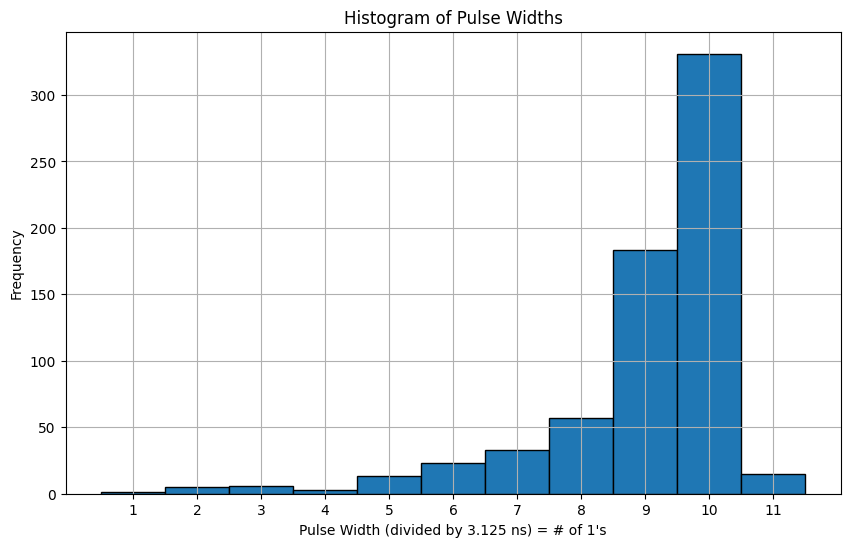

In [12]:
# Plot histogram with bins aligned to integers
plt.figure(figsize=(10, 6))
bin_edges = np.arange(np.min(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)']),
                      np.max(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)']) + 2) - 0.5
plt.hist(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)'], bins=bin_edges, edgecolor='black')
plt.title('Histogram of Pulse Widths')
plt.xlabel('Pulse Width (divided by 3.125 ns) = # of 1\'s')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(np.min(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)']),
                     np.max(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)']) + 1))
#plt.yscale('log')
plt.show()

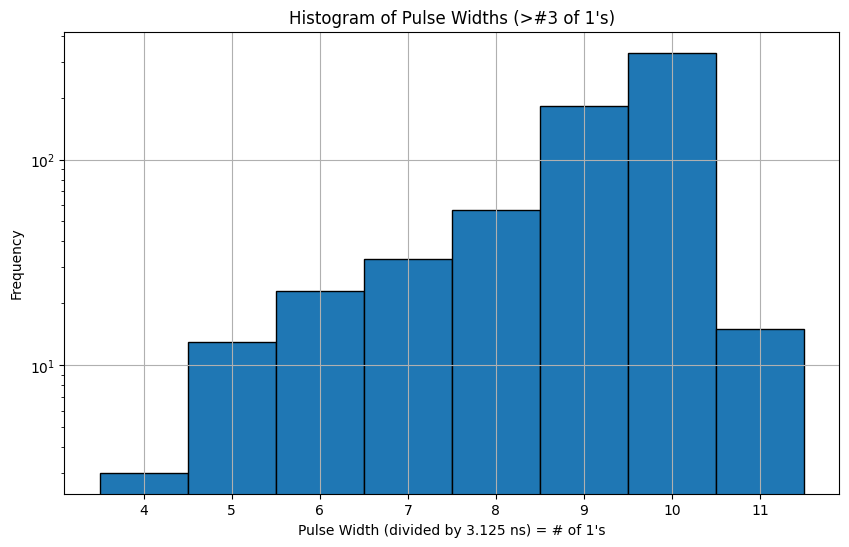

In [13]:
# Concatenate all pulse widths DataFrames
all_pulse_widths_df = pd.concat(dfs, ignore_index=True)

# Filter data to keep only values greater than 3
filtered_pulse_widths_df = all_pulse_widths_df[all_pulse_widths_df['Pulse Width (divided by 3.125 ns)'] > 3]

# Plot histogram with bins aligned to integers
plt.figure(figsize=(10, 6))
bin_edges = np.arange(np.min(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)']),
                      np.max(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)']) + 2) - 0.5
plt.hist(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)'], bins=bin_edges, edgecolor='black')
plt.title('Histogram of Pulse Widths (>#3 of 1\'s)')
plt.xlabel('Pulse Width (divided by 3.125 ns) = # of 1\'s')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(np.min(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)']),
                     np.max(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)']) + 1))
plt.yscale('log')
plt.show()

# Análisis de la distribución de #1's para la función offset con $tau_{1}=10$ y dejando $tau_{2}$ igual que en la simulación anterior (repetido 15 x 50 veces)

In [14]:
df_tau_10_1 = pd.read_csv("real_electronic_sim_tau_10/real_electronic_sim_1.txt", sep="	")
print(df_tau_10_1)

pulse_widths_tau_10_1 = []
threshold = 0.02  # 50 mV threshold (I put it a bit lower to ensure I am accurate)
pulse_start_time = None

for index, row in df_tau_10_1.iterrows():
    if row['V(out)'] > threshold and (pulse_start_time is None or df_tau_10_1['V(out)'].iloc[index-1] <= threshold):
        # Rising edge detected
        pulse_start_time = row['time']
    elif row['V(out)'] <= threshold and pulse_start_time is not None and df_tau_10_1['V(out)'].iloc[index-1] > threshold:
        # Falling edge detected
        pulse_end_time = row['time']
        # Calculate pulse width
        width = (pulse_end_time - pulse_start_time) / 3.125e-9
        pulse_widths_tau_10_1.append(width)
        # Reset pulse_start_time
        pulse_start_time = None

# Convert pulse_widths to a DataFrame and approximate to the closest lower integer
pulse_widths_df_tau_10_1 = pd.DataFrame(np.floor(pulse_widths_tau_10_1), columns=['Pulse Width (divided by 3.125 ns)'])
print(pulse_widths_df_tau_10_1)

                time  V(input)        V(out)     V(out_fs)  V(out_preamp)
0       0.000000e+00  0.000000  5.000000e-09  0.000000e+00   0.000000e+00
1       9.818273e-09  0.000007  5.000000e-09  4.382766e-10  -4.963152e-08
2       9.857286e-09  0.000032  5.000000e-09  9.507938e-09  -4.356355e-07
3       9.915591e-09  0.000128  5.000000e-09 -1.227778e-06  -3.976895e-06
4       9.973896e-09  0.000215  5.000000e-09 -4.381881e-07  -9.757647e-06
...              ...       ...           ...           ...            ...
307924  3.210294e-05  0.000060  5.000000e-09 -1.221032e-04  -6.058399e-04
307925  3.213467e-05  0.000060  5.000000e-09 -1.077858e-06  -6.007060e-04
307926  3.222989e-05  0.000060  5.000000e-09  2.320774e-06  -5.999979e-04
307927  3.248380e-05  0.000060  5.000000e-09  1.022367e-07  -5.999978e-04
307928  3.250000e-05  0.000060  5.000000e-09 -3.622813e-07  -5.999978e-04

[307929 rows x 5 columns]
    Pulse Width (divided by 3.125 ns)
0                                 6.0
1        

In [15]:
# Read and process all dataframes
dfs = []
for i in range(1, 16):
    df = pd.read_csv(f"real_electronic_sim_tau_10/real_electronic_sim_{i}.txt", sep="\t")
    
    pulse_widths = []
    threshold = 0.02  # 50 mV threshold (a bit lower for accuracy)
    pulse_start_time = None
    
    for index, row in df.iterrows():
        if row['V(out)'] > threshold and (pulse_start_time is None or df['V(out)'].iloc[index-1] <= threshold):
            # Rising edge detected
            pulse_start_time = row['time']
        elif row['V(out)'] <= threshold and pulse_start_time is not None and df['V(out)'].iloc[index-1] > threshold:
            # Falling edge detected
            pulse_end_time = row['time']
            # Calculate pulse width
            width = (pulse_end_time - pulse_start_time) / 3.125e-9
            pulse_widths.append(width)
            # Reset pulse_start_time
            pulse_start_time = None
    
    # Convert pulse_widths to a DataFrame and approximate to the closest lower integer
    pulse_widths_df = pd.DataFrame(np.floor(pulse_widths), columns=['Pulse Width (divided by 3.125 ns)'])
    dfs.append(pulse_widths_df)

# Concatenate all pulse widths DataFrames
all_pulse_widths_df = pd.concat(dfs, ignore_index=True)

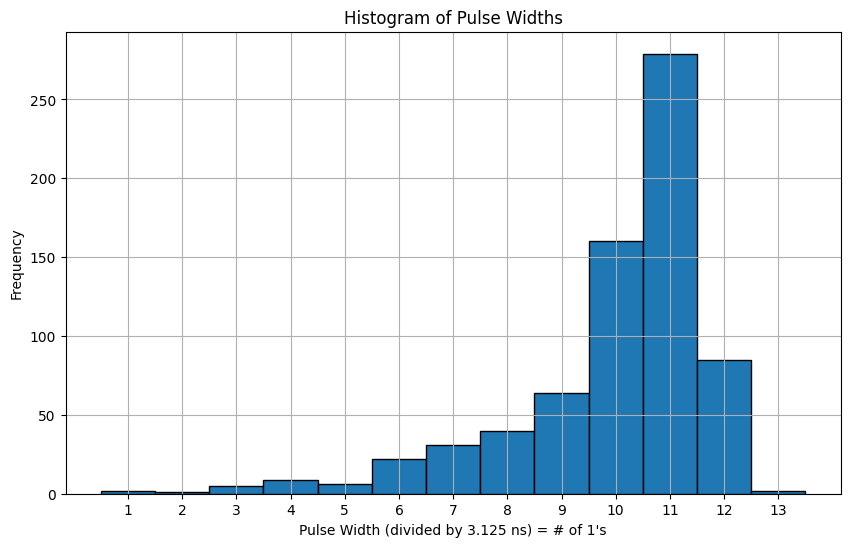

In [16]:
# Plot histogram with bins aligned to integers
plt.figure(figsize=(10, 6))
bin_edges = np.arange(np.min(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)']),
                      np.max(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)']) + 2) - 0.5
plt.hist(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)'], bins=bin_edges, edgecolor='black')
plt.title('Histogram of Pulse Widths')
plt.xlabel('Pulse Width (divided by 3.125 ns) = # of 1\'s')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(np.min(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)']),
                     np.max(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)']) + 1))
#plt.yscale('log')
plt.show()

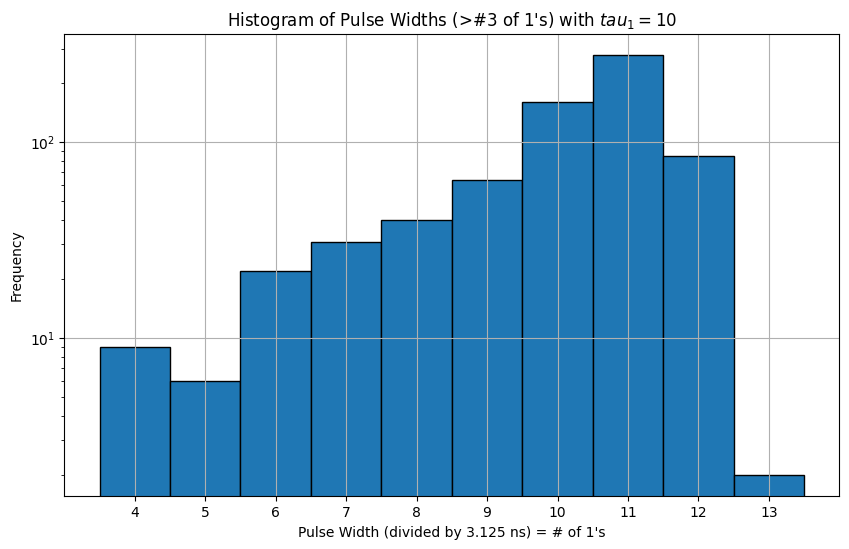

In [17]:
# Concatenate all pulse widths DataFrames
all_pulse_widths_df = pd.concat(dfs, ignore_index=True)

# Filter data to keep only values greater than 3
filtered_pulse_widths_df = all_pulse_widths_df[all_pulse_widths_df['Pulse Width (divided by 3.125 ns)'] > 3]

# Plot histogram with bins aligned to integers
plt.figure(figsize=(10, 6))
bin_edges = np.arange(np.min(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)']),
                      np.max(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)']) + 2) - 0.5
plt.hist(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)'], bins=bin_edges, edgecolor='black')
plt.title('Histogram of Pulse Widths (>#3 of 1\'s) with $tau_{1} = 10$')
plt.xlabel('Pulse Width (divided by 3.125 ns) = # of 1\'s')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(np.min(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)']),
                     np.max(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)']) + 1))
plt.yscale('log')
plt.show()

# Análisis de la distribución de #1's para la función offset con $tau_{1}=10$ y dejando $tau_{2}$ igual que en la simulación anterior (repetido 13 x 50 veces) cambiando el RC antes del FastShaper a un tiempo caracteristico de 5u y separando cada señal a 5tau (25u=25k n)

In [19]:
df_6 = pd.read_csv("real_electronic_sim.txt", sep="	")
print(df_6)

pulse_widths_6 = []
threshold = 0.02  # 50 mV threshold (I put it a bit lower to ensure I am accurate)
pulse_start_time = None

for index, row in df_6.iterrows():
    if row['V(out)'] > threshold and (pulse_start_time is None or df_6['V(out)'].iloc[index-1] <= threshold):
        # Rising edge detected
        pulse_start_time = row['time']
    elif row['V(out)'] <= threshold and pulse_start_time is not None and df_6['V(out)'].iloc[index-1] > threshold:
        # Falling edge detected
        pulse_end_time = row['time']
        # Calculate pulse width
        width = (pulse_end_time - pulse_start_time) / 3.125e-9
        pulse_widths_6.append(width)
        # Reset pulse_start_time
        pulse_start_time = None

# Convert pulse_widths to a DataFrame and approximate to the closest lower integer
pulse_widths_df_6 = pd.DataFrame(np.floor(pulse_widths_6), columns=['Pulse Width (divided by 3.125 ns)'])
print(pulse_widths_df_6)

                time  V(input)        V(out)     V(out_fs)  V(out_preamp)
0       0.000000e+00  0.000000  5.000000e-09  0.000000e+00   0.000000e+00
1       5.416806e-09  0.000006  5.000000e-09  1.889240e-09  -2.135515e-07
2       5.455819e-09  0.000029  5.000000e-09  4.102391e-08  -1.895347e-06
3       5.479827e-09  0.000074  5.000000e-09  1.924333e-07  -5.858024e-06
4       5.511437e-09  0.000132  5.000000e-09  6.874262e-07  -1.481232e-05
...              ...       ...           ...           ...            ...
192634  1.195201e-03  0.000026  5.000000e-09 -7.249329e-03  -2.647743e-04
192635  1.196373e-03  0.000024  5.000000e-09 -6.884865e-03  -2.389223e-04
192636  1.197545e-03  0.000021  5.000000e-09 -6.596994e-03  -2.130704e-04
192637  1.199889e-03  0.000016  5.000000e-09 -6.181748e-03  -1.613670e-04
192638  1.200000e-03  0.000016  5.000000e-09 -6.165763e-03  -1.589037e-04

[192639 rows x 5 columns]
    Pulse Width (divided by 3.125 ns)
0                                10.0
1        

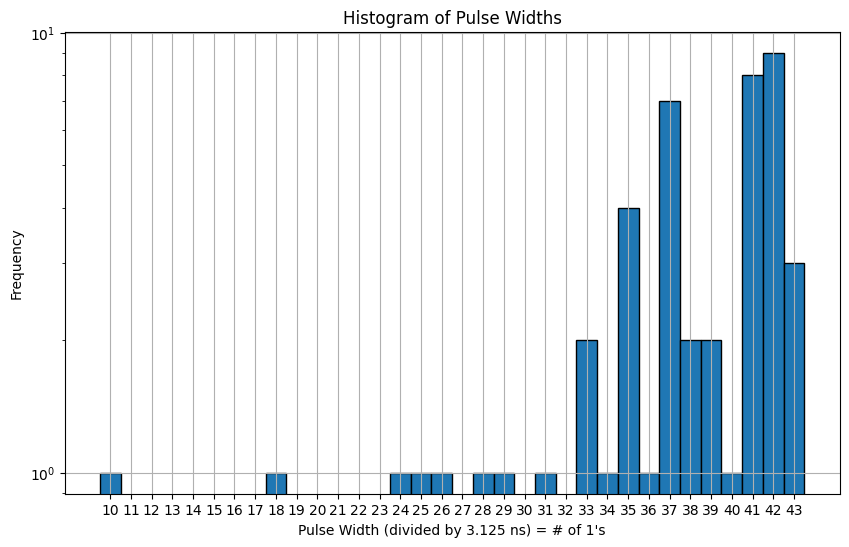

In [21]:
# Plot histogram with bins aligned to integers
plt.figure(figsize=(10, 6))
bin_edges = np.arange(np.min(pulse_widths_df_6['Pulse Width (divided by 3.125 ns)']),
                      np.max(pulse_widths_df_6['Pulse Width (divided by 3.125 ns)']) + 2) - 0.5
plt.hist(pulse_widths_df_6['Pulse Width (divided by 3.125 ns)'], bins=bin_edges, edgecolor='black')
plt.title('Histogram of Pulse Widths')
plt.xlabel('Pulse Width (divided by 3.125 ns) = # of 1\'s')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(np.min(pulse_widths_df_6['Pulse Width (divided by 3.125 ns)']),
                     np.max(pulse_widths_df_6['Pulse Width (divided by 3.125 ns)']) + 1))
plt.yscale('log')
plt.show()

In [24]:
# Read and process all dataframes
dfs = []
for i in range(1, 14):
    df = pd.read_csv(f"real_electronic_sim_tau_10_timegap_25k/real_electronic_sim_{i}.txt", sep="\t")
    
    pulse_widths = []
    threshold = 0.02  # 50 mV threshold (a bit lower for accuracy)
    pulse_start_time = None
    
    for index, row in df.iterrows():
        if row['V(out)'] > threshold and (pulse_start_time is None or df['V(out)'].iloc[index-1] <= threshold):
            # Rising edge detected
            pulse_start_time = row['time']
        elif row['V(out)'] <= threshold and pulse_start_time is not None and df['V(out)'].iloc[index-1] > threshold:
            # Falling edge detected
            pulse_end_time = row['time']
            # Calculate pulse width
            width = (pulse_end_time - pulse_start_time) / 3.125e-9
            pulse_widths.append(width)
            # Reset pulse_start_time
            pulse_start_time = None
    
    # Convert pulse_widths to a DataFrame and approximate to the closest lower integer
    pulse_widths_df = pd.DataFrame(np.floor(pulse_widths), columns=['Pulse Width (divided by 3.125 ns)'])
    dfs.append(pulse_widths_df)

# Concatenate all pulse widths DataFrames
all_pulse_widths_df = pd.concat(dfs, ignore_index=True)

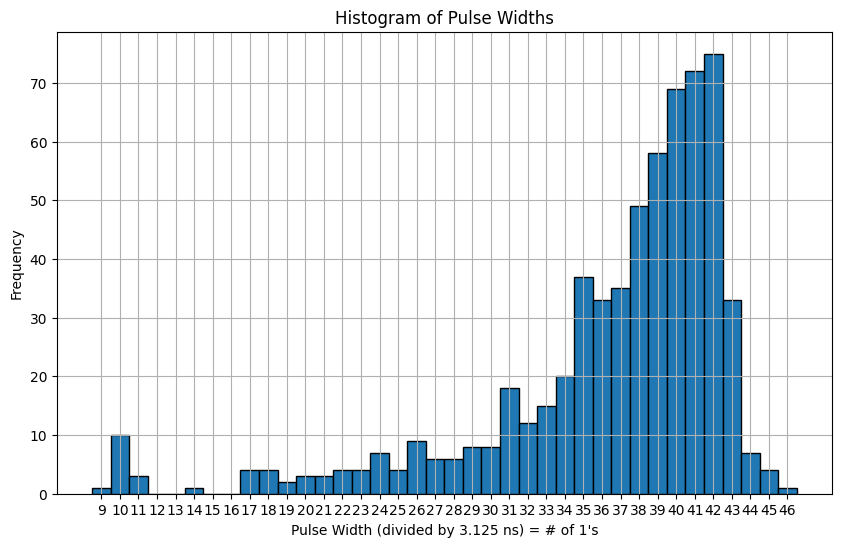

In [27]:
# Plot histogram with bins aligned to integers
plt.figure(figsize=(10, 6))
bin_edges = np.arange(np.min(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)']),
                      np.max(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)']) + 2) - 0.5
plt.hist(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)'], bins=bin_edges, edgecolor='black')
plt.title('Histogram of Pulse Widths')
plt.xlabel('Pulse Width (divided by 3.125 ns) = # of 1\'s')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(np.min(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)']),
                     np.max(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)']) + 1))
#plt.yscale('log')
plt.show()

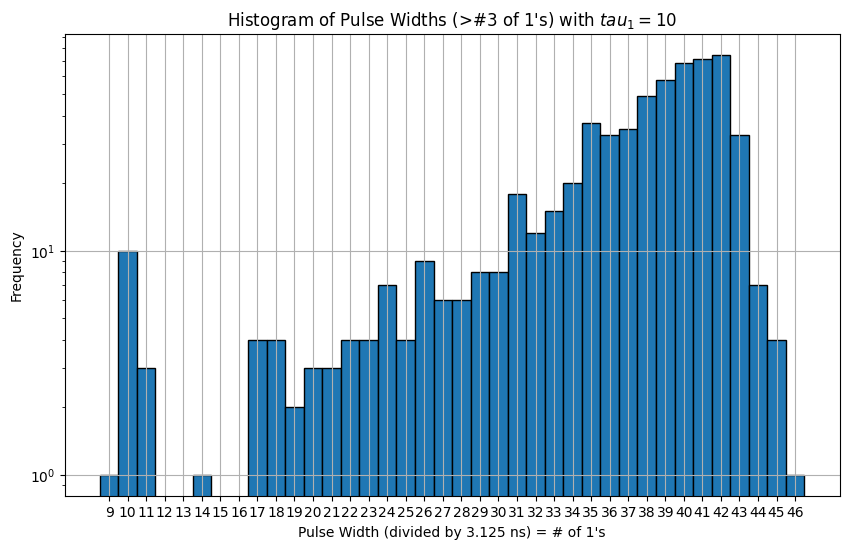

In [28]:
# Concatenate all pulse widths DataFrames
all_pulse_widths_df = pd.concat(dfs, ignore_index=True)

# Filter data to keep only values greater than 3
filtered_pulse_widths_df = all_pulse_widths_df[all_pulse_widths_df['Pulse Width (divided by 3.125 ns)'] > 3]

# Plot histogram with bins aligned to integers
plt.figure(figsize=(10, 6))
bin_edges = np.arange(np.min(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)']),
                      np.max(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)']) + 2) - 0.5
plt.hist(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)'], bins=bin_edges, edgecolor='black')
plt.title('Histogram of Pulse Widths (>#3 of 1\'s) with $tau_{1} = 10$')
plt.xlabel('Pulse Width (divided by 3.125 ns) = # of 1\'s')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(np.min(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)']),
                     np.max(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)']) + 1))
plt.yscale('log')
plt.show()

In [29]:
# Read and process all dataframes
dfs = []
for i in range(1, 21):
    df = pd.read_csv(f"real_electronic_sim_tau_10_timegap_25k/real_electronic_sim_{i}.txt", sep="\t")
    
    pulse_widths = []
    threshold = 0.02  # 50 mV threshold (a bit lower for accuracy)
    pulse_start_time = None
    
    for index, row in df.iterrows():
        if row['V(out)'] > threshold and (pulse_start_time is None or df['V(out)'].iloc[index-1] <= threshold):
            # Rising edge detected
            pulse_start_time = row['time']
        elif row['V(out)'] <= threshold and pulse_start_time is not None and df['V(out)'].iloc[index-1] > threshold:
            # Falling edge detected
            pulse_end_time = row['time']
            # Calculate pulse width
            width = (pulse_end_time - pulse_start_time) / 3.125e-9
            pulse_widths.append(width)
            # Reset pulse_start_time
            pulse_start_time = None
    
    # Convert pulse_widths to a DataFrame and approximate to the closest lower integer
    pulse_widths_df = pd.DataFrame(np.floor(pulse_widths), columns=['Pulse Width (divided by 3.125 ns)'])
    dfs.append(pulse_widths_df)

# Concatenate all pulse widths DataFrames
all_pulse_widths_df = pd.concat(dfs, ignore_index=True)

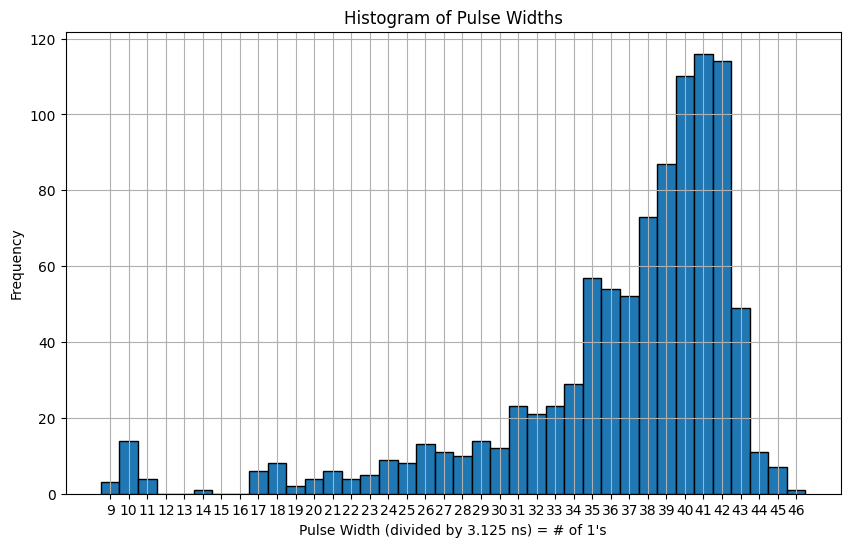

In [30]:
# Plot histogram with bins aligned to integers
plt.figure(figsize=(10, 6))
bin_edges = np.arange(np.min(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)']),
                      np.max(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)']) + 2) - 0.5
plt.hist(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)'], bins=bin_edges, edgecolor='black')
plt.title('Histogram of Pulse Widths')
plt.xlabel('Pulse Width (divided by 3.125 ns) = # of 1\'s')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(np.min(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)']),
                     np.max(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)']) + 1))
#plt.yscale('log')
plt.show()

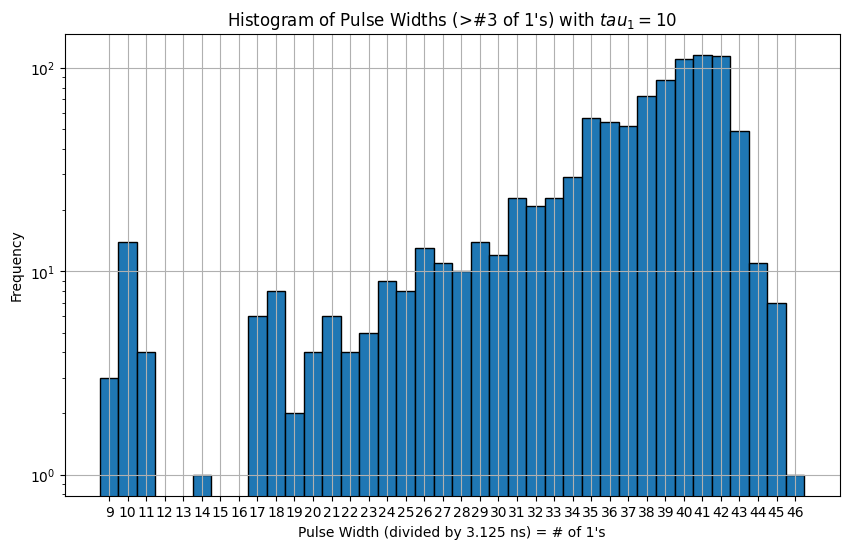

In [31]:
# Concatenate all pulse widths DataFrames
all_pulse_widths_df = pd.concat(dfs, ignore_index=True)

# Filter data to keep only values greater than 3
filtered_pulse_widths_df = all_pulse_widths_df[all_pulse_widths_df['Pulse Width (divided by 3.125 ns)'] > 3]

# Plot histogram with bins aligned to integers
plt.figure(figsize=(10, 6))
bin_edges = np.arange(np.min(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)']),
                      np.max(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)']) + 2) - 0.5
plt.hist(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)'], bins=bin_edges, edgecolor='black')
plt.title('Histogram of Pulse Widths (>#3 of 1\'s) with $tau_{1} = 10$')
plt.xlabel('Pulse Width (divided by 3.125 ns) = # of 1\'s')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(np.min(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)']),
                     np.max(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)']) + 1))
plt.yscale('log')
plt.show()

# Con la nueva electronica y los taus originales

In [42]:
df_6 = pd.read_csv("real_muons_100kgap_new_electronic/real_electronic_sim_1.txt", sep="	")
print(df_6)

pulse_widths_6 = []
threshold = 0.02  # 50 mV threshold (I put it a bit lower to ensure I am accurate)
pulse_start_time = None

for index, row in df_6.iterrows():
    if row['V(out)'] > threshold and (pulse_start_time is None or df_6['V(out)'].iloc[index-1] <= threshold):
        # Rising edge detected
        pulse_start_time = row['time']
    elif row['V(out)'] <= threshold and pulse_start_time is not None and df_6['V(out)'].iloc[index-1] > threshold:
        # Falling edge detected
        pulse_end_time = row['time']
        # Calculate pulse width
        width = (pulse_end_time - pulse_start_time) / 3.125e-9
        pulse_widths_6.append(width)
        # Reset pulse_start_time
        pulse_start_time = None

# Convert pulse_widths to a DataFrame and approximate to the closest lower integer
pulse_widths_df_6 = pd.DataFrame(np.floor(pulse_widths_6), columns=['Pulse Width (divided by 3.125 ns)'])
print(pulse_widths_df_6)

                time  V(input)        V(out)     V(out_fs)  V(out_preamp)
0       0.000000e+00  0.000000  5.000000e-09  0.000000e+00   0.000000e+00
1       8.507836e-09  0.000006  5.000000e-09  3.857243e-10  -1.174542e-07
2       8.552851e-09  0.000062  5.000000e-09  8.726668e-08  -4.433894e-06
3       8.580860e-09  0.000116  5.000000e-09  4.848920e-07  -1.199998e-05
4       8.612471e-09  0.000175  5.000000e-09  1.498998e-06  -2.468067e-05
...              ...       ...           ...           ...            ...
177398  4.957040e-03  0.000038  5.000000e-09 -1.097047e-06  -3.847164e-04
177399  4.971688e-03  0.000038  5.000000e-09 -4.426867e-08  -3.847164e-04
177400  4.991219e-03  0.000038  5.000000e-09 -6.207586e-10  -3.847164e-04
177401  4.996102e-03  0.000038  5.000000e-09 -5.721343e-10  -3.847164e-04
177402  5.000000e-03  0.000038  5.000000e-09 -1.987196e-09  -3.847164e-04

[177403 rows x 5 columns]
    Pulse Width (divided by 3.125 ns)
0                                 4.0
1        

In [37]:
# Read and process all dataframes
dfs = []
for i in range(1, 12):
    df = pd.read_csv(f"real_muons_100kgap_new_electronic/real_electronic_sim_{i}.txt", sep="\t")
    
    pulse_widths = []
    threshold = 0.02  # 50 mV is the height of the square signal and i put it a bit lower for accuracy
    pulse_start_time = None
    
    for index, row in df.iterrows():
        if row['V(out)'] > threshold and (pulse_start_time is None or df['V(out)'].iloc[index-1] <= threshold):
            # Rising edge detected
            pulse_start_time = row['time']
        elif row['V(out)'] <= threshold and pulse_start_time is not None and df['V(out)'].iloc[index-1] > threshold:
            # Falling edge detected
            pulse_end_time = row['time']
            # Calculate pulse width
            width = (pulse_end_time - pulse_start_time) / 3.125e-9
            pulse_widths.append(width)
            # Reset pulse_start_time
            pulse_start_time = None
    
    # Convert pulse_widths to a DataFrame and approximate to the closest lower integer
    pulse_widths_df = pd.DataFrame(np.floor(pulse_widths), columns=['Pulse Width (divided by 3.125 ns)'])
    dfs.append(pulse_widths_df)

# Concatenate all pulse widths DataFrames
all_pulse_widths_df = pd.concat(dfs, ignore_index=True)

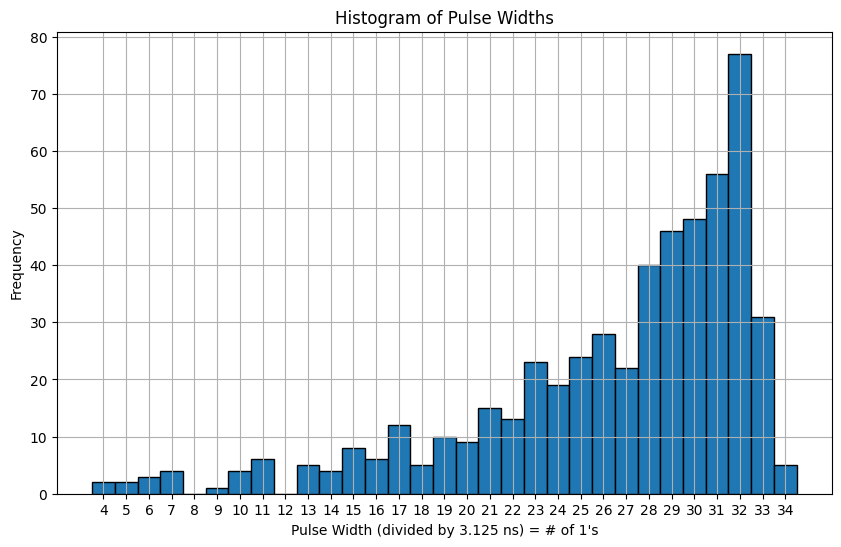

In [38]:
# Plot histogram with bins aligned to integers
plt.figure(figsize=(10, 6))
bin_edges = np.arange(np.min(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)']),
                      np.max(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)']) + 2) - 0.5
plt.hist(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)'], bins=bin_edges, edgecolor='black')
plt.title('Histogram of Pulse Widths')
plt.xlabel('Pulse Width (divided by 3.125 ns) = # of 1\'s')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(np.min(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)']),
                     np.max(all_pulse_widths_df['Pulse Width (divided by 3.125 ns)']) + 1))
#plt.yscale('log')
plt.show()

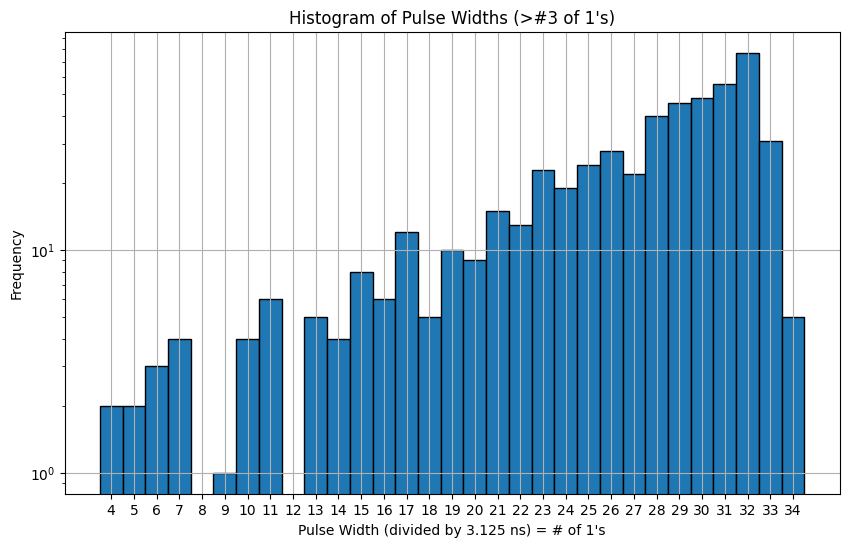

In [39]:
# Concatenate all pulse widths DataFrames
all_pulse_widths_df = pd.concat(dfs, ignore_index=True)

# Filter data to keep only values greater than 3
filtered_pulse_widths_df = all_pulse_widths_df[all_pulse_widths_df['Pulse Width (divided by 3.125 ns)'] > 3]

# Plot histogram with bins aligned to integers
plt.figure(figsize=(10, 6))
bin_edges = np.arange(np.min(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)']),
                      np.max(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)']) + 2) - 0.5
plt.hist(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)'], bins=bin_edges, edgecolor='black')
plt.title('Histogram of Pulse Widths (>#3 of 1\'s)')
plt.xlabel('Pulse Width (divided by 3.125 ns) = # of 1\'s')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(np.min(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)']),
                     np.max(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)']) + 1))
plt.yscale('log')
plt.show()

In [6]:
# Read and process all dataframes
dfs = []
for i in range(1, 31):
    df = pd.read_csv(f"real_electronic_sim/real_electronic_sim_{i}.txt", sep="\t")
    
    pulse_widths = []
    threshold = 0.8  # 1V is the height of the square signal and i put it a bit lower for accuracy
    pulse_start_time = None
    
    for index, row in df.iterrows():
        if row['V(out)'] > threshold and (pulse_start_time is None or df['V(out)'].iloc[index-1] <= threshold):
            # Rising edge detected
            pulse_start_time = row['time']
        elif row['V(out)'] <= threshold and pulse_start_time is not None and df['V(out)'].iloc[index-1] > threshold:
            # Falling edge detected
            pulse_end_time = row['time']
            # Calculate pulse width
            width = (pulse_end_time - pulse_start_time) / 3.125e-9
            pulse_widths.append(width)
            # Reset pulse_start_time
            pulse_start_time = None
    
    # Convert pulse_widths to a DataFrame and approximate to the closest lower integer
    pulse_widths_df = pd.DataFrame(np.floor(pulse_widths), columns=['Pulse Width (divided by 3.125 ns)'])
    dfs.append(pulse_widths_df)

# Concatenate all pulse widths DataFrames
all_pulse_widths_df = pd.concat(dfs, ignore_index=True)

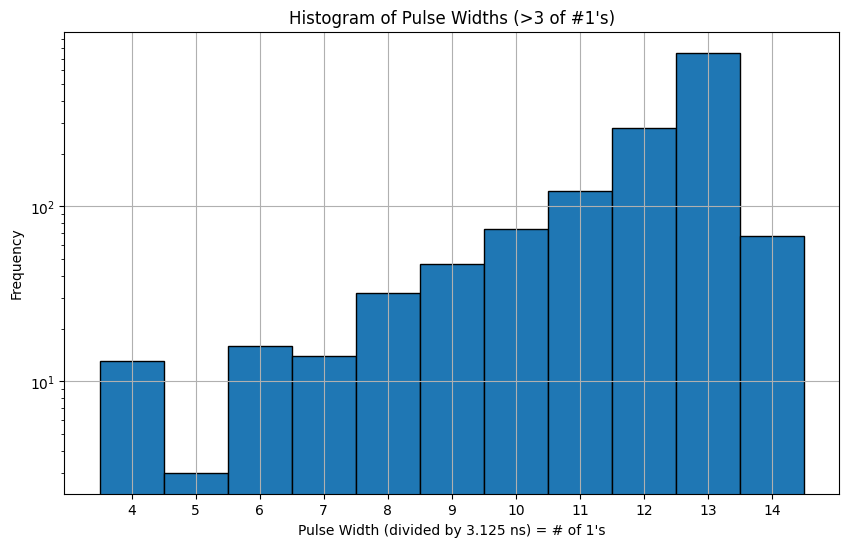

In [13]:
# Concatenate all pulse widths DataFrames
all_pulse_widths_df = pd.concat(dfs, ignore_index=True)

# Filter data to keep only values greater than 3
filtered_pulse_widths_df = all_pulse_widths_df[all_pulse_widths_df['Pulse Width (divided by 3.125 ns)'] > 3]

# Plot histogram with bins aligned to integers
plt.figure(figsize=(10, 6))
bin_edges = np.arange(np.min(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)']),
                      np.max(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)']) + 2) - 0.5
plt.hist(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)'], bins=bin_edges, edgecolor='black')
plt.title('Histogram of Pulse Widths (>3 of #1\'s)')
plt.xlabel('Pulse Width (divided by 3.125 ns) = # of 1\'s')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(np.min(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)']),
                     np.max(filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)']) + 1))
plt.yscale('log')
plt.savefig('C:/Users/smili/Documents/Laboratorio_6_7_ITeDA/ITEDA/hist_final.pdf', dpi=1000)
plt.show()

In [11]:
mean = filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)'].mean()
std=filtered_pulse_widths_df['Pulse Width (divided by 3.125 ns)'].std()

print(mean)
print(std)

12.043508771929824
1.7343405427066765
